In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
trainData = pd.read_csv('train.csv')
# testData = pd.read_csv('test.csv')
# combinedData = pd.concat([trainData, testData])

In [3]:
trainData.shape

(45593, 20)

In [6]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [7]:
trainData["Delivery_person_ID"].nunique()

1320

In [9]:
trainData.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [10]:
trainData["Time_taken(min)"].describe()

count        45593
unique          45
top       (min) 26
freq          2123
Name: Time_taken(min), dtype: object

In [18]:
trainData["Time_taken(min)"].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51], dtype=int64)

In [ ]:
trainData["Time_taken(min)"] = trainData["Time_taken(min)"].str.extract('(\d+)')


In [31]:
trainData["Time_taken(min)"] = pd.to_numeric(trainData["Time_taken(min)"])
trainData["Time_taken(min)"].dropna()
trainData["Time_taken(min)"].astype('int64')

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [21]:
trainData["Time_taken(min)"].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51], dtype=int64)

In [22]:
trainData["Time_taken(min)"].dropna()

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [23]:
trainData["Time_taken(min)"].count()

45593

In [25]:
trainData["Time_taken(min)"].describe()

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64

<AxesSubplot:xlabel='Time_taken(min)', ylabel='Count'>

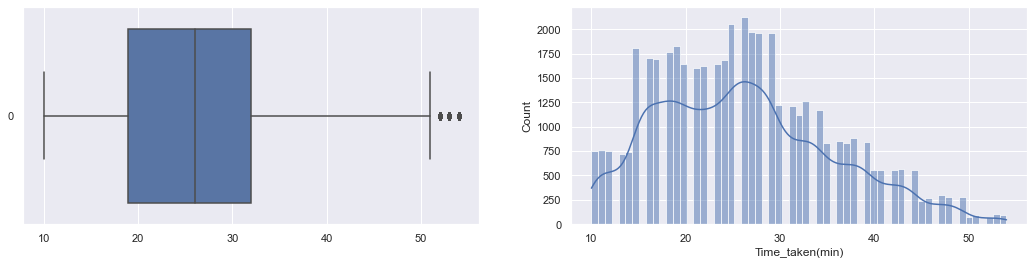

In [34]:
# Amount of the Credit
f, axes = plt.subplots(1, 2, figsize=(18, 4))
sb.boxplot(data = trainData["Time_taken(min)"], orient = "h", ax = axes[0])
sb.histplot(data = trainData["Time_taken(min)"], ax = axes[1], kde=True)

In [35]:
trainData['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

# Time Taken agaisnt Weather Condtions

In [50]:
trainData['Weatherconditions'] = trainData['Weatherconditions'].str.replace("conditions", "")  
print("Number of Conditions :", len(trainData["Weatherconditions"].unique()))
print(trainData.groupby('Weatherconditions', as_index=False)['Time_taken(min)'].mean())

Number of Conditions : 7
  Weatherconditions  Time_taken(min)
0            Cloudy        28.917330
1               Fog        28.916122
2               NaN        26.545455
3        Sandstorms        25.875517
4            Stormy        25.870815
5             Sunny        21.856947
6             Windy        26.118836


<AxesSubplot:xlabel='Weatherconditions', ylabel='Time_taken(min)'>

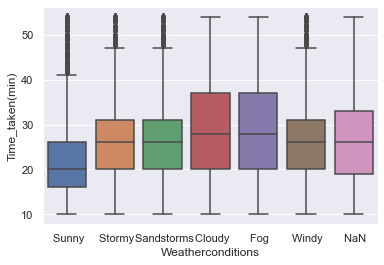

In [46]:
sb.boxplot(data=trainData, x='Weatherconditions', y='Time_taken(min)')

<AxesSubplot:xlabel='Weatherconditions', ylabel='Time_taken(min)'>

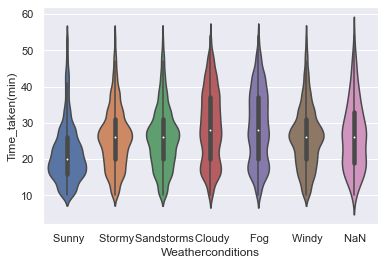

In [48]:
sb.violinplot(data=trainData, x='Weatherconditions', y='Time_taken(min)')

# Time Taken agaisnt Type of Order

In [56]:
print("Number of Orders :", len(trainData["Type_of_order"].unique()))
print(trainData.groupby('Type_of_order', as_index=False)['Time_taken(min)'].mean())

Number of Orders : 4
  Type_of_order  Time_taken(min)
0       Buffet         26.283511
1       Drinks         26.187953
2         Meal         26.419270
3        Snack         26.286309


<AxesSubplot:xlabel='Type_of_order', ylabel='Time_taken(min)'>

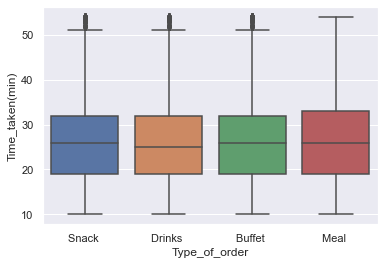

In [58]:
sb.boxplot(data=trainData, x='Type_of_order', y='Time_taken(min)')

<AxesSubplot:xlabel='Type_of_order', ylabel='Time_taken(min)'>

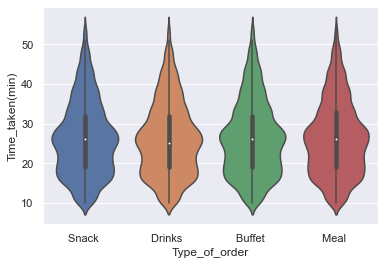

In [57]:
sb.violinplot(data=trainData, x='Type_of_order', y='Time_taken(min)')

In [59]:
print("Number of City :", len(trainData["City"].unique()))
print(trainData.groupby('City', as_index=False)['Time_taken(min)'].mean())

Number of City : 4
             City  Time_taken(min)
0  Metropolitian         27.315226
1            NaN         22.058333
2     Semi-Urban         49.731707
3          Urban         22.984017


<AxesSubplot:xlabel='City', ylabel='Time_taken(min)'>

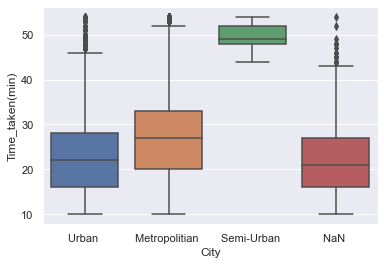

In [60]:
sb.boxplot(data=trainData, x='City', y='Time_taken(min)')

<AxesSubplot:xlabel='City', ylabel='Time_taken(min)'>

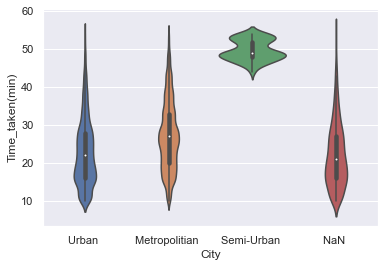

In [61]:
sb.violinplot(data=trainData, x='City', y='Time_taken(min)')

In [62]:
print("Number of Vehicles:", len(trainData["Type_of_vehicle"].unique()))
print(trainData.groupby('Type_of_vehicle', as_index=False)['Time_taken(min)'].mean())

Number of Vehicles: 4
     Type_of_vehicle  Time_taken(min)
0           bicycle         26.426471
1  electric_scooter         24.470110
2        motorcycle         27.605674
3           scooter         24.480754


<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

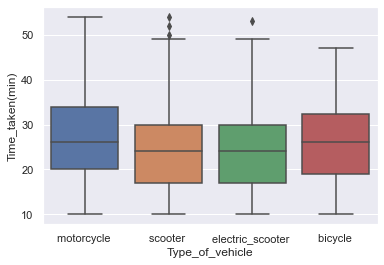

In [63]:
sb.boxplot(data=trainData, x='Type_of_vehicle', y='Time_taken(min)')

In [ ]:
Type_of_vehicle